In [1]:
#load sentiments_grouped.csv 

import pandas as pd
import numpy as np

df = pd.read_csv('sentiments_grouped.csv')

#df = df.dropna()

df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,processed_sentiment,sentiment_group
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,positive,positive
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,negative,negative
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,positive,positive
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,positive,positive
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,neutral,negative


In [2]:
df.sentiment_group.value_counts()

sentiment_group
negative     183
positive     177
happy        167
fearful      135
surprised     70
Name: count, dtype: int64

In [5]:
df = df.drop_duplicates(subset=['Text','Timestamp', 'Platform'], keep='first')

In [6]:
df.groupby('sentiment_group').Likes.agg([len, min, max]).sort_values(by='len', ascending=False).head(10)

C:\Users\Benjamin\AppData\Local\Temp\ipykernel_26504\731460045.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df.groupby('sentiment_group').Likes.agg([len, min, max]).sort_values(by='len', ascending=False).head(10)
C:\Users\Benjamin\AppData\Local\Temp\ipykernel_26504\731460045.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.groupby('sentiment_group').Likes.agg([len, min, max]).sort_values(by='len', ascending=False).head(10)


,len,min,max
sentiment_group,,,
negative,179,10.0,80.0
positive,172,15.0,80.0
happy,157,20.0,80.0
fearful,134,10.0,80.0
surprised,68,20.0,80.0


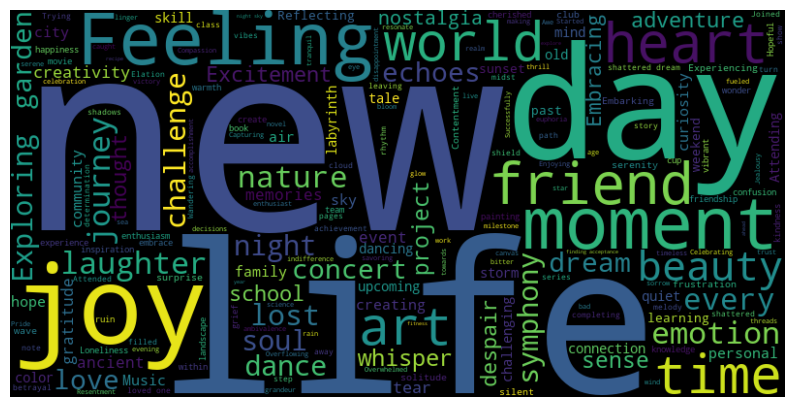

In [8]:
#Word Frequency and Text Analysis: Use natural language processing to identify common words, phrases, and topics, utilizing tools like word clouds or TF-IDF analysis.

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of words

text = df['Text'].values

# Join the list of words into a single string

text = ' '.join(text)

# Create the word cloud object

wordcloud = WordCloud(width=800, height=400).generate(text)

# Display the word cloud

plt.figure(figsize=(10,10))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')

plt.show()

In [9]:
#unique values in the column 'sentiment'

len(df['Sentiment'].unique())

278

In [10]:
#unique values in the column 'processed_sentiment'

len(df['sentiment_group'].unique())

5

In [11]:
#sentiment_group unique values
df['sentiment_group'].unique()

array(['positive', 'negative', 'fearful', 'happy', 'surprised'],
      dtype=object)

In [12]:
#Clean the text data by removing irrelevant information such as URLs, special characters, and emojis.

import re

def clean_text(text):
    text = re.sub(r'http\S+', '', text) #remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text) #remove special characters
    text = text.encode('ascii', 'ignore').decode('ascii') #remove emojis
    return text

df['cleaned_text'] = df['Text'].apply(clean_text)

df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,processed_sentiment,sentiment_group,cleaned_text
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,positive,positive,Enjoying a beautiful day at the park ...
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,negative,negative,Traffic was terrible this morning ...
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,positive,positive,Just finished an amazing workout
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,positive,positive,Excited about the upcoming weekend getaway ...
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,neutral,negative,Trying out a new recipe for dinner tonight ...


In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensuring the necessary NLTK resources are downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Load stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords and convert words to lower case
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)

# Assuming 'df' is your DataFrame and it has a column 'cleaned_text' that contains text
df['cleaned_text'] = df['cleaned_text'].apply(remove_stopwords)

# Display the first few rows to verify the changes
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Benjamin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Benjamin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,processed_sentiment,sentiment_group,cleaned_text
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,positive,positive,Enjoying beautiful day park
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,negative,negative,Traffic terrible morning
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,positive,positive,finished amazing workout
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,positive,positive,Excited upcoming weekend getaway
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,neutral,negative,Trying new recipe dinner tonight


In [14]:
#Normalize the text by converting it to lowercase and lemmatizing or stemming words to reduce variation.

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words]
    return ' '.join(lemmatized_words)

df['lemmatized_text'] = df['cleaned_text'].apply(lemmatize_text)

In [15]:
df.head(10)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,processed_sentiment,sentiment_group,cleaned_text,lemmatized_text
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,positive,positive,Enjoying beautiful day park,enjoying beautiful day park
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,negative,negative,Traffic terrible morning,traffic terrible morning
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,positive,positive,finished amazing workout,finished amazing workout
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,positive,positive,Excited upcoming weekend getaway,excited upcoming weekend getaway
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,neutral,negative,Trying new recipe dinner tonight,trying new recipe dinner tonight
5,5,5,Feeling grateful for the little things in lif...,Positive,2023-01-16 09:10:00,GratitudeNow,Twitter,#Gratitude #PositiveVibes,25.0,50.0,India,2023,1,16,9,positive,positive,Feeling grateful little things life,feeling grateful little thing life
6,6,6,Rainy days call for cozy blankets and hot coc...,Positive,2023-01-16 14:45:00,RainyDays,Facebook,#RainyDays #Cozy,10.0,20.0,Canada,2023,1,16,14,positive,positive,Rainy days call cozy blankets hot cocoa,rainy day call cozy blanket hot cocoa
7,7,7,The new movie release is a must-watch! ...,Positive,2023-01-16 19:30:00,MovieBuff,Instagram,#MovieNight #MustWatch,15.0,30.0,USA,2023,1,16,19,positive,positive,new movie release mustwatch,new movie release mustwatch
8,8,8,Political discussions heating up on the timel...,Negative,2023-01-17 08:00:00,DebateTalk,Twitter,#Politics #Debate,30.0,60.0,USA,2023,1,17,8,negative,negative,Political discussions heating timeline,political discussion heating timeline
9,9,9,Missing summer vibes and beach days. ...,Neutral,2023-01-17 12:20:00,BeachLover,Facebook,#Summer #BeachDays,18.0,35.0,Australia,2023,1,17,12,neutral,negative,Missing summer vibes beach days,missing summer vibe beach day


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assuming 'text' is the column with social media posts and 'sentiment_class' is the target column
X = df['lemmatized_text']
y = df['sentiment_group']

# Convert text data into numerical data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     fearful       0.64      0.52      0.57        31
       happy       0.64      0.55      0.59        29
    negative       0.66      0.66      0.66        35
    positive       0.55      0.88      0.67        33
   surprised       1.00      0.29      0.44        14

    accuracy                           0.62       142
   macro avg       0.70      0.58      0.59       142
weighted avg       0.66      0.62      0.61       142



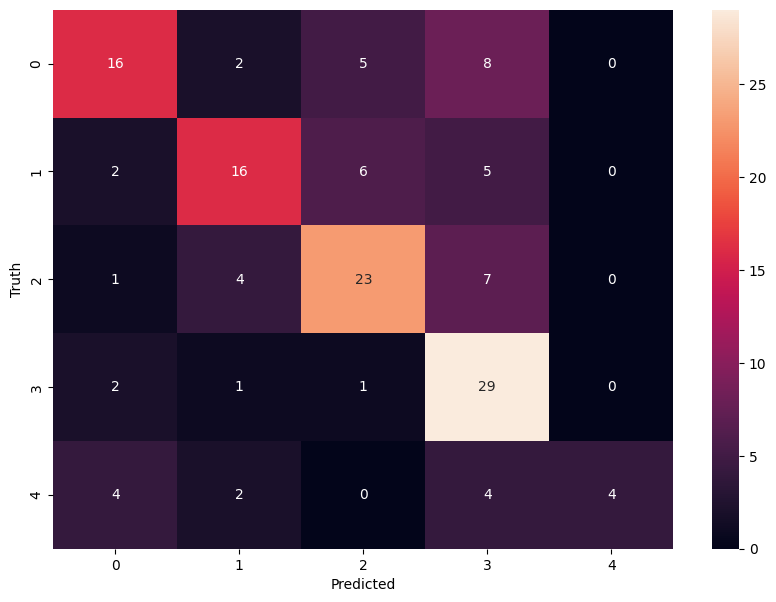

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

In [37]:
import spacy
import numpy as np

# Load the spacy model that you have installed
nlp = spacy.load('en_core_web_md')

# process a sentence using the model
def average_word_vectors(sentence):
    # This will return a document object
    doc = nlp(sentence)
    # doc.vector will return the average word vector for the entire document
    return doc.vector

# Get document level embeddings
spacy_feature_array = np.array([average_word_vectors(sent) for sent in df['lemmatized_text']])

In [39]:
#some feature engineering

#TF-IDF Analysis

from sklearn.feature_extraction.text import TfidfVectorizer

# Create the vectorizer object

vectorizer = TfidfVectorizer()

# Fit the vectorizer object to the text data
nltk.download('averaged_perceptron_tagger')

data_placeholder = vectorizer.fit_transform(df['cleaned_text']).toarray()


from nltk import pos_tag

def count_pos_tags(text):
    tagged = pos_tag(word_tokenize(text))
    count_noun = len([word for word, pos in tagged if pos in ['NN', 'NNS', 'NNP', 'NNPS']])
    count_verb = len([word for word, pos in tagged if pos in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']])
    count_adj = len([word for word, pos in tagged if pos in ['JJ', 'JJR', 'JJS']])
    return count_noun, count_verb, count_adj

pos_counts = np.array([count_pos_tags(text) for text in df['Text']])

X = np.hstack([spacy_feature_array, data_placeholder, pos_counts])


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Benjamin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


In [51]:
from nltk import ngrams
from nltk.tokenize import word_tokenize

def generate_ngrams(text, n=2):
    tokens = word_tokenize(text)
    n_grams = ngrams(tokens, n)
    return [' '.join(grams) for grams in n_grams]

# Applying n-grams function to the 'text' column
df['bigrams'] = df['Text'].apply(generate_ngrams)

# Output the DataFrame
print(df[['Text', 'bigrams']])

# Convert the list of bigrams into a single string for each document
df['bigrams_str'] = df['bigrams'].apply(' '.join)

                                                  Text  \
0     Enjoying a beautiful day at the park!        ...   
1     Traffic was terrible this morning.           ...   
2     Just finished an amazing workout! 💪          ...   
3     Excited about the upcoming weekend getaway!  ...   
4     Trying out a new recipe for dinner tonight.  ...   
..                                                 ...   
727  Collaborating on a science project that receiv...   
728  Attending a surprise birthday party organized ...   
729  Successfully fundraising for a school charity ...   
730  Participating in a multicultural festival, cel...   
731  Organizing a virtual talent show during challe...   

                                               bigrams  
0    [Enjoying a, a beautiful, beautiful day, day a...  
1    [Traffic was, was terrible, terrible this, thi...  
2    [Just finished, finished an, an amazing, amazi...  
3    [Excited about, about the, the upcoming, upcom...  
4    [Trying out, 

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Assuming 'spacy_feature_array' is your new X and 'sentiment_group' is the target column
X = df['bigrams_str']
y = df['sentiment_group']

# Convert bigrams into numerical data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     fearful       0.70      0.61      0.66        31
       happy       0.45      0.45      0.45        29
    negative       0.65      0.63      0.64        35
    positive       0.50      0.73      0.59        33
   surprised       0.50      0.14      0.22        14

    accuracy                           0.56       142
   macro avg       0.56      0.51      0.51       142
weighted avg       0.57      0.56      0.55       142



In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#bag of words model

from sklearn.feature_extraction.text import CountVectorizer

# Create the vectorizer object

vectorizer = CountVectorizer()

# Fit the vectorizer object to the text data

X = vectorizer.fit_transform(df['cleaned_text'])

# Create a DataFrame from the word count array

df_word_count = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the DataFrame

df_word_count.head()


y = df['sentiment_group']


# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

input_string_ex = "wow I am so surprised"

def predict_class(input_string):
    # Preprocess the input string
    cleaned_text = lemmatize_text(remove_stopwords(clean_text(input_string)))  # Replace with your text cleaning function
    X_input = vectorizer.transform([cleaned_text])

    # Use the model to predict the class
    y_pred = model.predict(X_input)

    return y_pred[0]

print(predict_class(input_string_ex))

              precision    recall  f1-score   support

     fearful       0.68      0.61      0.64        31
       happy       0.69      0.62      0.65        29
    negative       0.71      0.71      0.71        35
    positive       0.59      0.88      0.71        33
   surprised       1.00      0.29      0.44        14

    accuracy                           0.67       142
   macro avg       0.74      0.62      0.63       142
weighted avg       0.70      0.67      0.66       142

positive
